# KMC log analysis

In [7]:
# Utilizar o arquivo Simulation_forster_singlet_.txt 
# Ler os log para fazer analises básicas (contar mortes,trpl,etc)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
%matplotlib widget

#files = [i for i in os.listdir('.') if 'Simulation' in i]
#menu  = widgets.Dropdown(options=files, values=files[0],description='KMC log file:',disabled=False)
#display(menu)

# Basic info

0.422
[35.516, 64.484]
[35.516, 6.2048]
[58.2792]


<AxesSubplot:title={'center':'Number of excitons by cause of death'}, xlabel='Cause of Death', ylabel='Excitons (%)'>

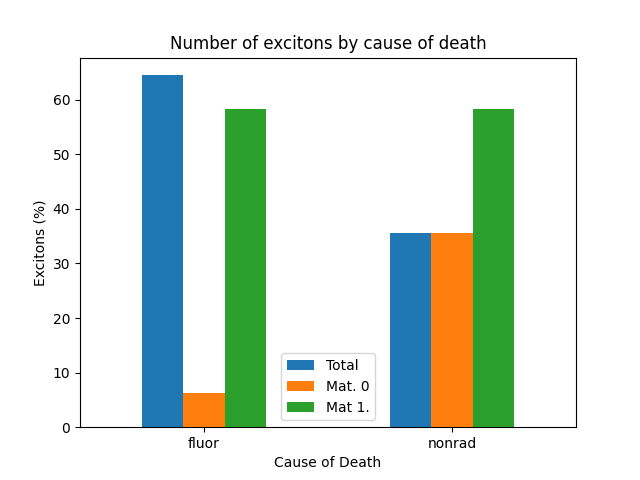

In [89]:
#log_file = [i for i in os.listdir('.') if 'Simulation' in i and ".txt" in i] #menu.value
##print(log_file)
#for log in log_file:
#    data = pd.read_csv(log, delim_whitespace=True)
#    conc = log.split("_")[2]
#    #print(conc)
#    data = data[data.Time != 'END']
#    dead = data[data.Status == "dead"]
#    fluor_NPB = dead[(dead.CausaMortis == "fluor")]

log = "Simulation_NPB_0.422_D_39.46_.txt"
data = pd.read_csv(log, delim_whitespace=True)
conc = log.split("_")[2]
print(conc)
data = data[data.Time != 'END']


#Death_counter
dead = data[data.Status == "dead"]
dead_mat0 = dead[dead.Location == 0.0]
dead_mat1 = dead[dead.Location == 1.0]
deaths = pd.unique(dead["CausaMortis"])#.plot(kind="bar")
deaths_mat0 = pd.unique(dead_mat0["CausaMortis"])
deaths_mat1 = pd.unique(dead_mat1["CausaMortis"])
n_exciton = len(dead)
#print("Total deaths:")
COD_total = []
COD_prct_total = []
for i in range(0,len(deaths)):
    cause_of_death = dead[dead.CausaMortis == deaths[i]]
    COD_total.append(len(cause_of_death))
    COD_prct_total.append(len(cause_of_death)/(n_exciton/100))
    #print("         ", deaths[i], len(cause_of_death))

total_dead = {"cod" : deaths[:], "n": COD_prct_total[:] }

#df = pd.DataFrame(total_dead, columns = ["cod", "n"])
#df = df.sort_values(by = "cod")
#df.plot.bar(x="cod", y = "n", rot=0, title ="Number of excitons by cause of death", xlabel = "Cause of Death", ylabel = "Excitons (%)", legend= False)



COD_mat0 = []
COD_prct_mat0 = []
for i in range(0,len(deaths_mat0)):
    cause_of_death = dead_mat0[dead_mat0.CausaMortis == deaths_mat0[i]]
    COD_mat0.append(len(cause_of_death))
    COD_prct_mat0.append(len(cause_of_death)/(n_exciton/100))
    #print("         ", deaths_mat0[i], len(cause_of_death))




COD_mat1 = []
COD_prct_mat1 = []
for i in range(0,len(deaths_mat1)):
    cause_of_death = dead_mat1[dead_mat1.CausaMortis == deaths_mat1[i]]
    COD_mat1.append(len(cause_of_death))
    COD_prct_mat1.append(len(cause_of_death)/(n_exciton/100))
    #print("         ", deaths_mat1[i], len(cause_of_death))


print(COD_prct_total)
print(COD_prct_mat0)
print(COD_prct_mat1)

info = {"cod": deaths[:], "Total": COD_prct_total[:], "Mat. 0": COD_prct_mat0, "Mat 1.": COD_prct_mat1[:]}
index = [deaths[0],deaths[1]]
df2 = pd.DataFrame(info,index = index)#info, columns = ["cod", "ntotal", "nmat0"])
df2 = df2.sort_values(by = "cod")
df2.plot.bar(rot=0, title ="Number of excitons by cause of death", xlabel = "Cause of Death", ylabel = "Excitons (%)", legend= True)










In [85]:
fluor_NPB  = dead[(dead.CausaMortis == "fluor") & (dead.Location == 0.0)]
nonrad_NPB = dead[(dead.CausaMortis == "nonrad") & (dead.Location == 0.0)]
ISC_NPB = data[(data.Status == "converted") & (data.CausaMortis == "isc") & (data.Location == 0.0)]
rISC_NPB = data[(data.Status == "converted") & (data.CausaMortis == "risc") & (data.Location == 0.0)]

print("Fluor NPB:",len(fluor_NPB)) #bash
print("Nonrad NPB:",len(nonrad_NPB)) #bash
print("ISC NPB:",len(ISC_NPB)) #bash
print("rISC NPB:",len(rISC_NPB)) #bash
print("--------------------------------------")

fluor_DCJTB = dead[(dead.CausaMortis == "fluor") & (dead.Location == 1.0)]
nonrad_DCJTB = dead[(dead.CausaMortis == "nonrad") & (dead.Location == 1.0)]
ISC_DCJTB = data[(data.Status == "converted") & (data.CausaMortis == "isc") & (data.Location == 1.0)]
rISC_DCJTB = data[(data.Status == "converted") & (data.CausaMortis == "risc") & (data.Location == 1.0)]
print("Fluor DCJTB:",len(fluor_DCJTB)) #bash
print("Nonrad DCJTB:",len(nonrad_DCJTB)) #bash
print("ISC DCJTB:",len(ISC_DCJTB)) #bash
print("rISC DCJTB:",len(rISC_DCJTB)) #bash
print("--------------------------------------")

TTS_NPB_NPB = data[(data.Status == "converted") & (data.CausaMortis == "tts") & (data.Location == 0.0)]
TTS_NPB_DCJTB = data[(data.Status == "converted") & (data.CausaMortis == "tts") & (data.Location == 1.0)]
print("TTS NPB p/ NPB:", len(TTS_NPB_NPB))
print("TTS NPB p/ DCJTB:", len(TTS_NPB_DCJTB))

Fluor NPB: 15512
Nonrad NPB: 88790
ISC NPB: 49546
rISC NPB: 49545
--------------------------------------
Fluor DCJTB: 145698
Nonrad DCJTB: 0
ISC DCJTB: 0
rISC DCJTB: 0
--------------------------------------
TTS NPB p/ NPB: 0
TTS NPB p/ DCJTB: 1


In [ ]:
#print("     Material 0:")
#for i in range(0,len(deaths_mat0)):
#    cause_of_death = dead_mat0[dead_mat0.CausaMortis == deaths_mat0[i]]
#    print("         ", deaths_mat0[i], len(cause_of_death))
#print("     Material 1:")
#for i in range(0,len(deaths_mat1)):
#    cause_of_death = dead_mat1[dead_mat1.CausaMortis == deaths_mat1[i]]
#    print("         ", deaths_mat1[i], len(cause_of_death))
#
#
#
##Converted counter:
#converted = data[data.Status == "converted"]
#converted_mat0 = converted[converted.Location == 0.0]
#converted_mat1 = converted[converted.Location == 1.0]
#converts = pd.unique(converted["CausaMortis"])
#converts_mat0 = pd.unique(converted_mat0["CausaMortis"]) 
#converts_mat1 = pd.unique(converted_mat1["CausaMortis"])
#print("Total conversion:")
#for i in range(0,len(converts)):
#    cause_of_death = converted[converted.CausaMortis == converts[i]]
#    print("         ", "Process:",converts[i], len(cause_of_death))
#print("     Material 0:")
#for i in range(0,len(converts_mat0)):
#    cause_of_death = converted_mat0[converted_mat0.CausaMortis == converts_mat0[i]]
#    print("         ", "Process:",converts_mat0[i], len(cause_of_death))
#print("     Material 1:")
#for i in range(0,len(converts_mat1)):
#    cause_of_death = converted_mat1[converted_mat1.CausaMortis == converts_mat1[i]]
#    print("          ","Process:",converts_mat1[i], len(cause_of_death))
#
#

# Normalized TRPL Generator

The fitted lifetime is: 9.96 ns


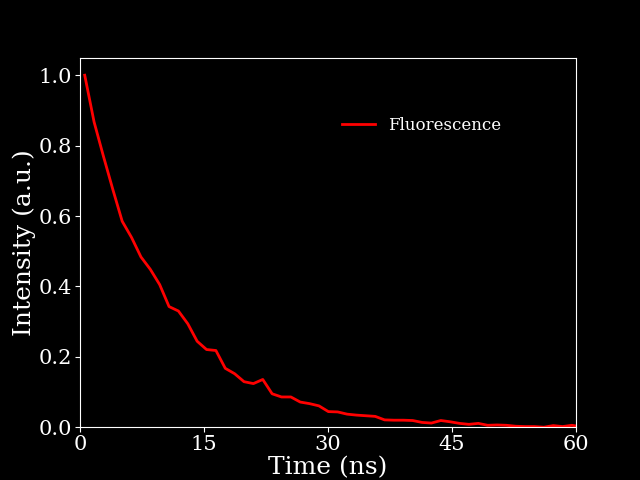

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.optimize as spopt 

style.use('dark_background')
fluorescence = data[data.CausaMortis == 'fluor']
fluorescence = fluorescence['Time'].to_numpy(float)
hist, bins = np.histogram(fluorescence, bins=75) 

#Due to hist and bins having difference sizes, we adjust by taking the center part of the bins
bins = bins[:-1] + (bins[1:]-bins[:-1])/2

#Plot generator:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
fig, ax = plt.subplots()
#pylab.rcParams.update(params)
#fig.set_size_inches(12,6)

ax.plot(bins/1000,hist/max(hist),lw=2, color='red', label='Fluorescence')   #Defines the data set and normalizes the y axes
ax.set_xlabel("Time (ns)", fontsize=18,labelpad=2)                          #Defines the x axis' label parameters
ax.set_ylabel("Intensity (a.u.)", fontsize=18,labelpad=2)                   #Defines the y axis' label parameters
ax.set_xlim([0,60])                                                          #Defines the x range
ax.set_xticks([0,15,30,45,60])                                               #Defines the x ticks step
ax.tick_params(axis='x', labelsize=15, pad=2)                               #Customizes the x ticks (axis,size,vertical offset)  
ax.set_ylim([0,1.05])                                                        #Defines the y range
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])                                       #Defines the y ticks step
ax.tick_params(axis='y', labelsize=15, pad=2)                               #Customizes the y ticks (axis,size,horizontal offset)  
legx= ax.legend(bbox_to_anchor=(0.88,0.88), fontsize=12, frameon=False )
#ax.ticklabel_format(axis='x', style="sci", scilimits=(0,0))

#Define the fitting function:
def monoExp(x,a,t):
    return a*np.exp(-x/t)

#Initial guess for the parameters:
initial_params=[1.0,10.0]

#Performs the curve fit:
popt, pcov = spopt.curve_fit(monoExp,bins/1000,hist/max(hist))

#Prints the fit parameters:
print('The fitted lifetime is:', "{:.2f}".format(popt[1]),'ns')